In [1]:
%matplotlib inline
import os
import wordcloud
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from janome.tokenizer import Tokenizer
from PIL import Image

In [2]:
#ファイルの指定->title,dir_nameに該当ファイル名,フォルダ名を入力。
title = 'seiri5'
dir_name1 = 'data'
dir_name2 = 'wc'
keishiki = '.txt'
path1 = r'C:\Users\0000501785\OneDrive - 日本放送協会\Jupyter'

#テキストの読み込み 
path = os.path.join(path1, dir_name1, dir_name2, title) + keishiki
print(path)
f = open(path, 'r', encoding = 'UTF-8')
text = f.read()
#print(text)

C:\Users\0000501785\OneDrive - 日本放送協会\Jupyter\data\wc\seiri5.txt


In [3]:
tk = Tokenizer()
words_list = []

#名詞・形容詞・動詞を抽出（動詞、形容詞、形容動詞、名詞、副詞、連体詞、接続詞、感動詞、助動詞、助詞）

hinshi = ['動詞','形容詞','形容動詞','名詞','副詞','感動詞']

for i in hinshi:
    for token in tk.tokenize(text):
        if token.part_of_speech.split(",")[0] == i:
            words_list.append(token.surface)

#for token in tk.tokenize(text):
#    if token.part_of_speech.split(",")[0] == "形容詞":
#            words_list.append(token.surface)
            
#1文字の単語を出現させるにはregexpの設定が必要
wc = wordcloud.WordCloud(width=2000, height=1200, 
                         background_color="white", font_path=r"C:\Windows\Fonts\AP-OTF-A1GothicStd-Bold.otf",
                         regexp="[\w']+")

In [4]:
import collections
c = collections.Counter(words_list)
print(c.most_common(50))

[('し', 328), ('こと', 327), ('生理', 298), ('"', 258), ('の', 195), ('思い', 170), ('する', 155), ('い', 148), ('よう', 137), ('思う', 134), ('性', 134), ('教育', 129), ('いる', 126), ('性教育', 126), ('人', 99), ('ある', 98), ('いい', 91), ('なっ', 85), ('女性', 85), ('知識', 83), ('ほしい', 78), ('教え', 77), ('的', 76), ('学校', 76), ('私', 72), ('自分', 71), ('男女', 67), ('事', 67), ('方', 64), ('れ', 62), ('もっと', 62), ('なる', 61), ('さ', 61), ('必要', 61), ('理解', 59), ('子供', 58), ('ため', 57), ('もの', 54), ('男性', 54), ('妊娠', 53), ('できる', 49), ('時', 49), ('あり', 48), ('良い', 48), ('授業', 48), ('思っ', 46), ('ない', 46), ('頃', 44), ('話', 43), ('今', 42)]


In [5]:
#jogaiに消去したい単語を登録）
import itertools
jogai = ['こと','"','い','し','の','よう','する','思う','あり','いる','時','ある','れ','ない',
         'さ','くる','もの','的','られ','方','知っ','気','良かっ','なっ','ん','くれ','もっと',
         'よく','とき','ところ','事','聞い','思っ','あっ','何','知ら','ため','もらっ','でき',
         'なる','て','(','それ','その','なく','いけ','頃']

#jogaiに登録した単語【以外】のwords_listを作り直す≓リストからjogaiの要素を全削除
for i in jogai:
    words_list = [a for a in words_list if a != i]

#kaisuu = []
#for i in jogai:
#    n = words_list.count(i)
#    kaisuu.append(n)
#    for _ in itertools.repeat(None, n):
#        words_list.remove(i)
#print(kaisuu)

figsize [12.8  7.2]
C:\Users\0000501785\OneDrive - 日本放送協会\Jupyter\out\wc\seiri5.png


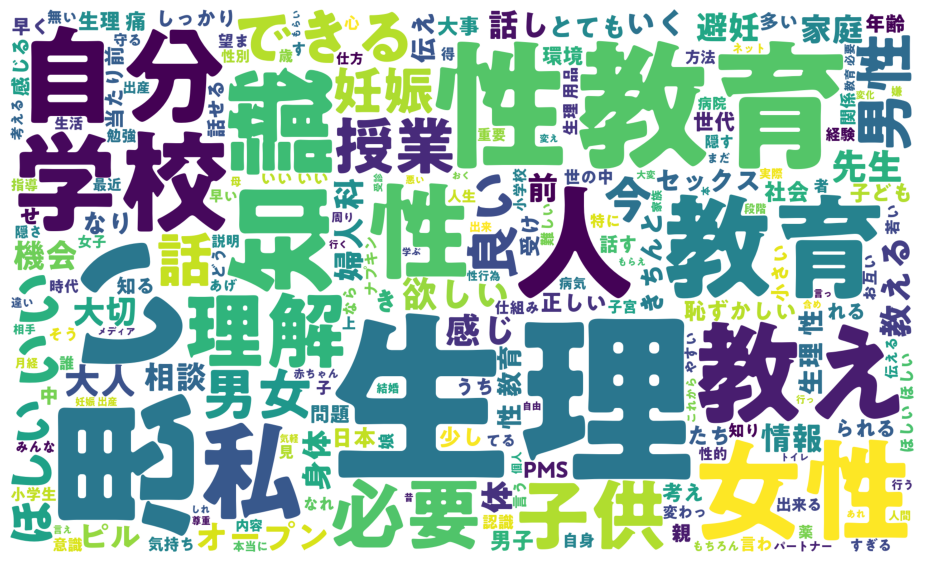

In [6]:
#画像の大きさを設定
figsize_px = np.array([1280, 720])
dpi = 100
figsize_inch = figsize_px / dpi
print("figsize", figsize_inch)  # figsize (6.4, 3.6)
fig, ax = plt.subplots(figsize=figsize_inch, dpi=dpi)

#描画する
wc.generate(" ".join(words_list))
plt.imshow(wc)
plt.axis("off")
#保存先の指定
dir_name1 = 'out'
keishiki = '.png'
path = os.path.join(path1, dir_name1, dir_name2, title) + keishiki
print(path)

#画像の保存
plt.savefig(path)

In [10]:
words_list.clear()